Linear Regression

- STEPS:
    1. Design model (I/O size, forward pass)
    2. Construct loss and optimizer
    3. Training loop
        - forward pass: compute prediction
        - backward pass: compute gradient
        - update weights

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [16]:
#step 0.: Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

# reshaping y : to change 1 row vector to 1 column vector
y = y.view(y.shape[0],1) #view is from torch; is used to reshape

# samples and features
n_samples, n_features = X.shape

print(y)


tensor([[-5.5539e+01],
        [-1.0662e+01],
        [ 2.2757e+01],
        [ 1.0110e+02],
        [ 1.4434e+02],
        [ 3.3289e+01],
        [ 3.3015e+01],
        [-2.5887e+01],
        [-9.9639e+01],
        [ 2.3803e+01],
        [-4.5589e+01],
        [-8.3388e+00],
        [-9.5315e+01],
        [ 3.6407e+01],
        [-8.7293e+01],
        [ 6.7669e+01],
        [-1.3687e+01],
        [-5.5441e+01],
        [-6.5340e+01],
        [-5.4450e+01],
        [-2.8835e+01],
        [ 1.7884e+02],
        [ 6.5084e+01],
        [ 2.6668e+01],
        [-1.8546e+01],
        [-4.1499e+01],
        [ 8.5583e-01],
        [ 4.4562e+01],
        [ 1.1598e+02],
        [-6.4620e+01],
        [-2.5931e+01],
        [-6.0882e+01],
        [ 1.8720e+01],
        [ 7.5070e+01],
        [ 1.1720e+02],
        [-2.2698e+01],
        [-5.6363e+01],
        [ 1.8084e+02],
        [-1.9257e+02],
        [ 6.8503e+01],
        [ 1.6552e+02],
        [ 1.0500e+02],
        [-7.0434e+01],
        [-5

In [28]:
#step 1.: model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [29]:
#step 2.: loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [30]:
# step 3.: training loop
n_iters = 1000
for epoch in range(n_iters):
    #forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted,y)

    #backwad pass
    loss.backward()

    #update weight = optimize
    optimizer.step() #gradient descent
    optimizer.zero_grad() #emptying gradients

    if (epoch+1)%10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
    

epoch: 10, loss = 4447.9941
epoch: 20, loss = 3317.5815
epoch: 30, loss = 2499.5813
epoch: 40, loss = 1907.0258
epoch: 50, loss = 1477.3597
epoch: 60, loss = 1165.5231
epoch: 70, loss = 939.0136
epoch: 80, loss = 774.3563
epoch: 90, loss = 654.5770
epoch: 100, loss = 567.3867
epoch: 110, loss = 503.8814
epoch: 120, loss = 457.6013
epoch: 130, loss = 423.8576
epoch: 140, loss = 399.2430
epoch: 150, loss = 381.2803
epoch: 160, loss = 368.1668
epoch: 170, loss = 358.5901
epoch: 180, loss = 351.5941
epoch: 190, loss = 346.4819
epoch: 200, loss = 342.7452
epoch: 210, loss = 340.0133
epoch: 220, loss = 338.0155
epoch: 230, loss = 336.5544
epoch: 240, loss = 335.4855
epoch: 250, loss = 334.7035
epoch: 260, loss = 334.1311
epoch: 270, loss = 333.7123
epoch: 280, loss = 333.4057
epoch: 290, loss = 333.1813
epoch: 300, loss = 333.0170
epoch: 310, loss = 332.8968
epoch: 320, loss = 332.8087
epoch: 330, loss = 332.7441
epoch: 340, loss = 332.6969
epoch: 350, loss = 332.6623
epoch: 360, loss = 332.

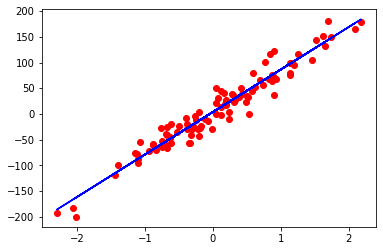

In [31]:
#Plot
predicted = model(X).detach()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot (X_numpy, predicted, 'b')
plt.show() 

- Cell 8: 
    - detach:
        - to prevent the tensor 'predicted' from being tracked in computational graph (ie requires_grad = False)
        - done to convert 'predicted' tensor to numpy so that it can be plotted
    - 'ro' : red dots
    - 'b' : blue line